In [3]:
import pandas as pd
import glob
import warnings
from sklearn.pipeline import Pipeline

### Function for preprocess of the dataframe

In [4]:
def preprocess_indiv_burner_PTET_no_SULFreq(df):
    df_c = df.copy(deep=True)
    df_c.columns = df_c.columns+'_'+df_c.iloc[0,:]+ '_'+df_c.iloc[1,:]
    #drop the date
    SGT750 = df_c.iloc[2:,1:]
    #Change the index to sequence
    SGT750.index = range(1,SGT750.shape[0]+1)
#     check na values
    nalist  = [x for x in SGT750.isna().sum() if x>0]
    if not(nalist):
        print("No na values")
    else:
    #drop na values
        SGT750 = SGT750.dropna()
    return(SGT750)

### Funtion to filter the columns in the dataframe

In [5]:
def modifydata2(SGT750):
    datay = SGT750.filter(regex='Flame')
    Burner1 = SGT750.loc[:,[datay.columns[0],'MBM10CP005_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP005_XE02_Low Frequency Pulsation_mbar','MBM10CP005_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP005_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 1_Avg']]
    Burner2 = SGT750.loc[:,[datay.columns.values[1],'MBM10CP010_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP010_XE02_Low Frequency Pulsation_mbar','MBM10CP010_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP010_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 2_Avg']]
    Burner3 = SGT750.loc[:,[datay.columns.values[2],'MBM10CP015_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP015_XE02_Low Frequency Pulsation_mbar','MBM10CP015_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP015_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 3_Avg']]
    Burner4 = SGT750.loc[:,[datay.columns.values[3],'MBM10CP020_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP020_XE02_Low Frequency Pulsation_mbar','MBM10CP020_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP020_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 4_Avg']]
    Burner5 = SGT750.loc[:,[datay.columns.values[4],'MBM10CP025_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP025_XE02_Low Frequency Pulsation_mbar','MBM10CP025_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP025_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 5_Avg']]
    Burner6 = SGT750.loc[:,[datay.columns.values[5],'MBM10CP030_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP030_XE02_Low Frequency Pulsation_mbar','MBM10CP030_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP030_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 6_Avg']]
    Burner7 = SGT750.loc[:,[datay.columns.values[6],'MBM10CP035_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP035_XE02_Low Frequency Pulsation_mbar','MBM10CP035_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP035_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 7_Avg']]
    Burner8 = SGT750.loc[:,[datay.columns.values[7],'MBM10CP040_XE01_Ultra Low Frequency Pulsation_mbar',
                            'MBM10CP040_XE02_Low Frequency Pulsation_mbar','MBM10CP040_XE03_Medium Frequency Pulsation_mbar',
                            'MBM10CP040_XE04_High Frequency Pulsation_mbar',
                            'MBB10FT923_ZE11_T7 Exhaust Temp Average Ring1_°C','MBB10FT923_ZE12_T7 Exhaust Temp Average Ring 2_°C',
                            'MBB10FT923_ZE13_T7 Exhaust Temp Average Ring 3_°C','Powerturbine Inlet Temp 8_Avg']]
    datalist = [Burner1,Burner2,Burner3,Burner4,Burner5,Burner6,Burner7,Burner8]
    dfcols = ['BurnerStatus','UltraLow_Frequency','Low_Frequency','Medium_Frequency','High_Frequency','TempRing1','TempRing2','TempRing3','T_6']
    for dc in datalist:
        dc.columns = dfcols
    return(datalist)

In [6]:
Non_index_list = ['MBB10CT050_XE01_Powerturbine Inlet Temp 1_°C',
                                           'MBB10CT050_XE02_Powerturbine Inlet Temp 1_°C',
                                           'MBB10CT050_XE03_Powerturbine Inlet Temp 1_°C',
                                           'MBB10CT055_XE01_Powerturbine Inlet Temp 2_°C',
                                           'MBB10CT055_XE02_Powerturbine Inlet Temp 2_°C',
                                           'MBB10CT055_XE03_Powerturbine Inlet Temp 2_°C',
                                           'MBB10CT060_XE01_Powerturbine Inlet Temp 3_°C',
                                           'MBB10CT060_XE02_Powerturbine Inlet Temp 3_°C',
                                           'MBB10CT060_XE03_Powerturbine Inlet Temp 3_°C',
                                           'MBB10CT065_XE01_Powerturbine Inlet Temp 4_°C',
                                           'MBB10CT065_XE02_Powerturbine Inlet Temp 4_°C',
                                           'MBB10CT065_XE03_Powerturbine Inlet Temp 4_°C',
                                           'MBB10CT070_XE01_Powerturbine Inlet Temp 5_°C',
                                           'MBB10CT070_XE02_Powerturbine Inlet Temp 5_°C',
                                           'MBB10CT070_XE03_Powerturbine Inlet Temp 5_°C',
                                           'MBB10CT075_XE01_Powerturbine Inlet Temp 6_°C',
                                           'MBB10CT075_XE02_Powerturbine Inlet Temp 6_°C',
                                           'MBB10CT075_XE03_Powerturbine Inlet Temp 6_°C',
                                           'MBB10CT080_XE01_Powerturbine Inlet Temp 7_°C',
                                           'MBB10CT080_XE02_Powerturbine Inlet Temp 7_°C',
                                           'MBB10CT080_XE03_Powerturbine Inlet Temp 7_°C',
                                           'MBB10CT085_XE01_Powerturbine Inlet Temp 8_°C',
                                           'MBB10CT085_XE02_Powerturbine Inlet Temp 8_°C',
                                           'MBB10CT085_XE03_Powerturbine Inlet Temp 8_°C']

In [7]:
groupby_dict = {"MBB10CT050_XE01_Powerturbine Inlet Temp 1_°C":"Powerturbine Inlet Temp 1_Avg",
#            "MBB10CT050_XE02_Powerturbine Inlet Temp 1_°C":"Powerturbine Inlet Temp 1_Avg",
           "MBB10CT050_XE03_Powerturbine Inlet Temp 1_°C":"Powerturbine Inlet Temp 1_Avg",
                
                'MBB10CT055_XE01_Powerturbine Inlet Temp 2_°C':"Powerturbine Inlet Temp 2_Avg",
            'MBB10CT055_XE02_Powerturbine Inlet Temp 2_°C':"Powerturbine Inlet Temp 2_Avg",
           'MBB10CT055_XE03_Powerturbine Inlet Temp 2_°C':"Powerturbine Inlet Temp 2_Avg",
                
                "MBB10CT060_XE01_Powerturbine Inlet Temp 3_°C":"Powerturbine Inlet Temp 3_Avg",
           "MBB10CT060_XE02_Powerturbine Inlet Temp 3_°C":"Powerturbine Inlet Temp 3_Avg",
           "MBB10CT060_XE03_Powerturbine Inlet Temp 3_°C":"Powerturbine Inlet Temp 3_Avg",
                
                "MBB10CT065_XE01_Powerturbine Inlet Temp 4_°C":"Powerturbine Inlet Temp 4_Avg",
           "MBB10CT065_XE02_Powerturbine Inlet Temp 4_°C":"Powerturbine Inlet Temp 4_Avg",
           "MBB10CT065_XE03_Powerturbine Inlet Temp 4_°C":"Powerturbine Inlet Temp 4_Avg",
                
                "MBB10CT070_XE01_Powerturbine Inlet Temp 5_°C":"Powerturbine Inlet Temp 5_Avg",
           "MBB10CT070_XE02_Powerturbine Inlet Temp 5_°C":"Powerturbine Inlet Temp 5_Avg",
           "MBB10CT070_XE03_Powerturbine Inlet Temp 5_°C":"Powerturbine Inlet Temp 5_Avg",
                
                "MBB10CT075_XE01_Powerturbine Inlet Temp 6_°C":"Powerturbine Inlet Temp 6_Avg",
           "MBB10CT075_XE02_Powerturbine Inlet Temp 6_°C":"Powerturbine Inlet Temp 6_Avg",
           "MBB10CT075_XE03_Powerturbine Inlet Temp 6_°C":"Powerturbine Inlet Temp 6_Avg",
                
                "MBB10CT080_XE01_Powerturbine Inlet Temp 7_°C":"Powerturbine Inlet Temp 7_Avg",
           "MBB10CT080_XE02_Powerturbine Inlet Temp 7_°C":"Powerturbine Inlet Temp 7_Avg",
           "MBB10CT080_XE03_Powerturbine Inlet Temp 7_°C":"Powerturbine Inlet Temp 7_Avg",
                
                "MBB10CT085_XE01_Powerturbine Inlet Temp 8_°C":"Powerturbine Inlet Temp 8_Avg",
           "MBB10CT085_XE02_Powerturbine Inlet Temp 8_°C":"Powerturbine Inlet Temp 8_Avg",
           "MBB10CT085_XE03_Powerturbine Inlet Temp 8_°C":"Powerturbine Inlet Temp 8_Avg"
               }
# Dataframe1 = Dataframe1.apply(lambda x : pd.to_numeric(x))
# Dataframe_dropped_values = Dataframe1.drop(Non_index_list, axis = 1)
# T6_average_values = Dataframe1.groupby(groupby_dict,axis = 1).mean()
# ModifiedDF = pd.concat([Dataframe_dropped_values, T6_average_values],axis = 1)

### Upload all files to mylist

In [8]:
mylist = glob.glob(r'C:\Users\z004csar\Thesis_Project\Flame_monitoring2\FlameStatusApp\RawData\TimeSeriesData\*.xlsx')

### Load the Excel files to a dictionary

In [26]:
Datadic = {}

from tqdm import tqdm,tnrange

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    for i in tnrange(len(mylist)):
        Datadic[i] = pd.read_excel(mylist[i],engine="openpyxl")
        

  0%|          | 0/90 [00:00<?, ?it/s]

### Preprocess List of Burners to a single Dataframe

In [32]:
import random
def preprocessdf(dfdictolist,shufflelist = False):
    preprocesseddf1 = {}
    ModifiedDF = {}
    for i in range(len(Datadic)):
        preprocesseddf1[i] = preprocess_indiv_burner_PTET_no_SULFreq(Datadic[i]).apply(lambda x : pd.to_numeric(x))
        ModifiedDF[i] = modifydata2(pd.concat([preprocesseddf1[i].drop(Non_index_list, axis = 1),preprocesseddf1[i].groupby(groupby_dict,axis = 1).mean()],axis = 1))
    BurnerList  = []
    for i,j in ModifiedDF.items():
        BurnerList.extend(j) 
    if shufflelist:
        random.shuffle(BurnerList)
    ConcatenatedList = pd.concat(BurnerList,axis=0)
    return ConcatenatedList


In [35]:
# import matplotlib.pyplot as plt
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(ConcatenatedList.index[1000:2000],ConcatenatedList.iloc[:,8][1000:2000], 'g-')
# ax2.plot(ConcatenatedList.index[1000:2000],ConcatenatedList.iloc[:,0][1000:2000], 'b-')

In [34]:
Newdf = preprocessdf(Datadic,shufflelist=True)

No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values
No na values


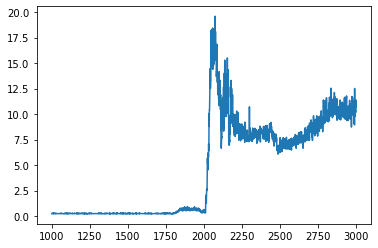

In [43]:
plt.plot(Newdf[1000:3000]['Medium_Frequency'])

## AR on medium frequency